<a href="https://colab.research.google.com/github/tgundavelli/Computer-Vision/blob/main/HarrisCornerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://mengtang.org/cse185/files/resource/horse.jpg',"horse.jpg")

('horse.jpg', <http.client.HTTPMessage at 0x7c27dbef7490>)

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as pl

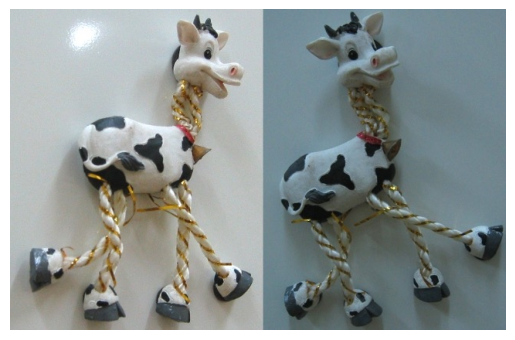

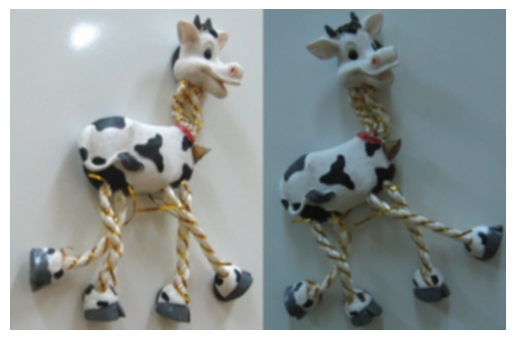

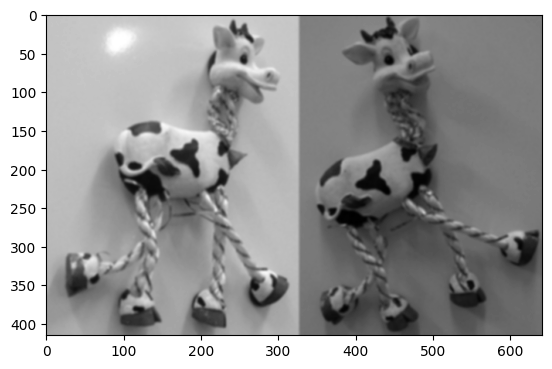

In [ ]:
image = cv2.imread('horse.jpg')
horse = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
blurred_horse = cv2.GaussianBlur(horse,(5, 5),1.4)
gray_blur = cv2.cvtColor(blurred_horse,cv2.COLOR_RGB2GRAY)

pl.imshow(horse)
pl.axis('off')
pl.show()

pl.imshow(blurred_horse)
pl.axis('off')
pl.show()

pl.imshow(gray_blur, cmap = 'gray')
pl.show()

In [ ]:
dx = cv2.Sobel(gray_blur,cv2.CV_64F, 1, 0, ksize = 5)
dy = cv2.Sobel(gray_blur,cv2.CV_64F, 0, 1, ksize = 5)

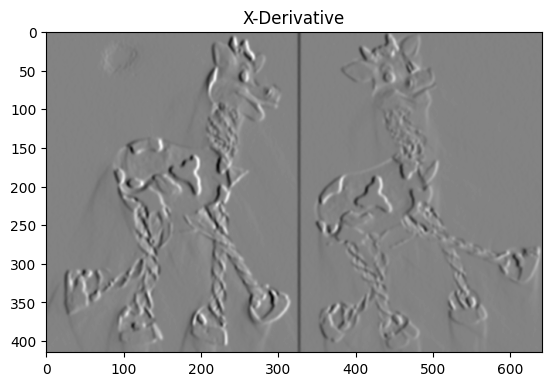

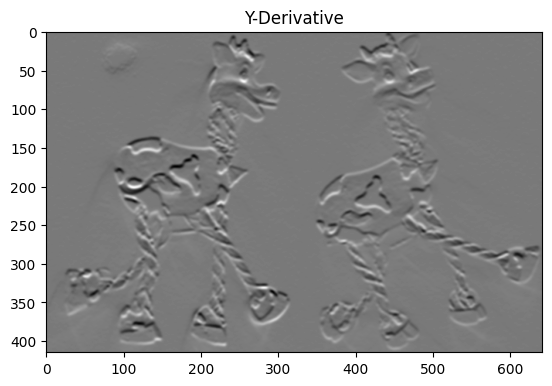

In [ ]:
pl.imshow(dx,cmap='gray')
pl.title('X-Derivative')

pl.show()

pl.imshow(dy,cmap= 'gray')
pl.title('Y-Derivative')

pl.show()

In [ ]:
Ixx = cv2.GaussianBlur(dx * dx, (5,5), 1.4)
Iyy = cv2.GaussianBlur(dy * dy, (5,5), 1.4)
Ixy = cv2.GaussianBlur(dx * dy, (5,5), 1.4)

In [ ]:
R = np.zeros((gray_blur.shape[0],gray_blur.shape[1]), np.float32)

for x in range(gray_blur.shape[0]):
    for y in range(gray_blur.shape[1]):
      Harris = np.array([[Ixx[x][y], Ixy[x][y]], [Ixy[x][y], Iyy[x][y]]])

      determinant = np.linalg.det(Harris)
      trace = np.trace(Harris)

      R[x][y] = determinant - (0.04 * trace * trace)

R_normalized = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX,cv2.CV_8U)

don't use np.uint8

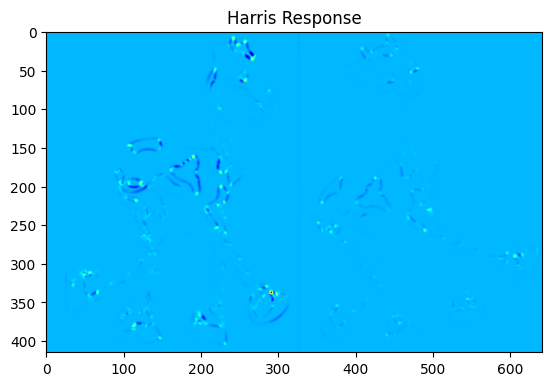

In [ ]:
pl.imshow(R, cmap = 'jet')
pl.title('Harris Response')
pl.show()

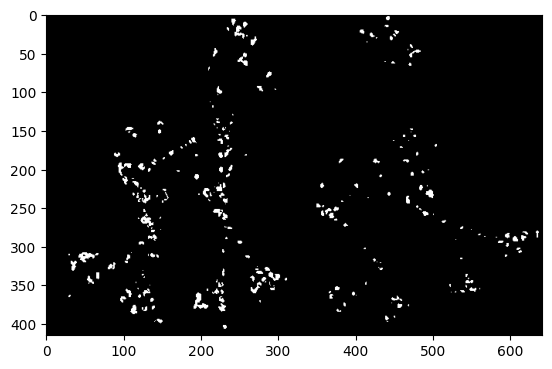

In [ ]:
thresholded_image = np.zeros_like(R, dtype= np.uint8)

thresholded_image[R > 0.01 * R.max()] = 255

pl.imshow(thresholded_image, cmap = 'gray')
pl.show()

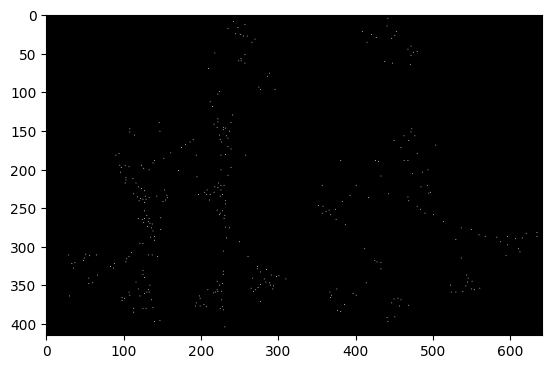

In [ ]:
local_maxima_image = (R > 0.01 * R.max()) & (R == cv2.dilate(R, None))

pl.imshow(local_maxima_image, cmap = 'gray')
pl.show()

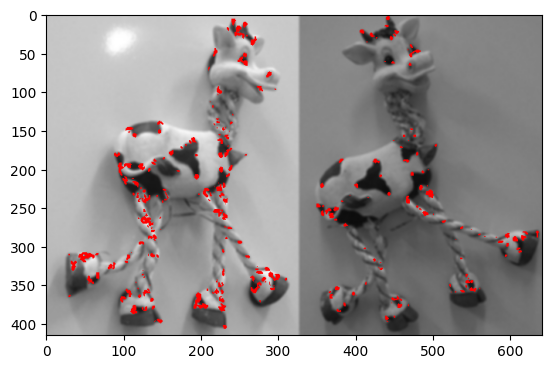

In [ ]:
result = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2RGB)
result[R > 0.01*R.max()] = np.array([255,0,0])

pl.imshow(result, cmap = 'gray')
pl.show()